In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

Run 

`rsync -aP paroma@dawn11.stanford.edu:/dfs/scratch0/paroma/VisualGenome/bc/*.npz VG_bc/` 

to get updated npz files

In [69]:
#Folder where the .npz files are saved
data_folder = '/dfs/scratch0/paroma/DDSM/pruner/'

In [70]:
def parse_results_small(file_name):
    data = np.load(file_name)
    val_f1 = data["name7"]
    val_acc = data["name3"]
    return val_f1, val_acc

In [71]:
def parse_results_all(file_name):
    data = np.load(file_name)
    train_acc = data["name1"]
    train_loss = data["name2"]
    val_acc = data["name3"]
    val_loss = data["name4"]
    pr = data["name5"]
    re = data["name6"]
    f1 = data["name7"]
    tpr = data["name8"]
    fpr = data["name9"]
    thresh = data["name10"]
    auc = data["name11"]

    return train_acc, train_loss, val_acc, val_loss, pr, re, f1, tpr, fpr, thresh, auc

In [72]:
#Hyperparams copied from hyperparam_search.py in /dfs/scratch0/paroma/FirstAid/
network = 'GoogLe'
leftout = []

# VG
# lr_arr = [1e-7, 1e-6, 1e-5]
# reg_arr = [1e-4, 1e-3, 1e-2, 1e-1]
# bs_arr = [128]
# do_arr = [0.2, 0.4, 0.6, 0.8]

# DDSM
lr_arr = [1e-6, 1e-5, 1e-4, 1e-3]
reg_arr = [1e-4, 1e-3, 1e-2, 1e-1]
bs_arr = [64]
do_arr = [0.2, 0.4, 0.6, 0.8]

val_accs = np.zeros((len(lr_arr), len(reg_arr), len(do_arr)))

for i,lr in enumerate(lr_arr):
    for j,reg in enumerate(reg_arr):
        for k,do in enumerate(do_arr):
            
            try:
                val_f1,val_acc =  parse_results_small(data_folder+network+'_'+str(lr)+'_1.0_0.0_'+
                                                         str(reg)+'_64_'+str(do)+'.npz')
                val_accs[i,j,k] = np.max(val_acc)
                val_accs[i,j,k] = np.max(val_f1)
                #val_accs[i,j,k] = np.mean(val_acc[-1])
            except:
                leftout.append((lr,reg,do))
                val_accs[i,j,k] = 0.0
#np.save('gt_leftout.npy',np.array(leftout))

### Plot Hyperparam Search Validation Accuracies

In [73]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
sns.set_context("poster")
color_list = sns.color_palette("PuBuGn_d",4)

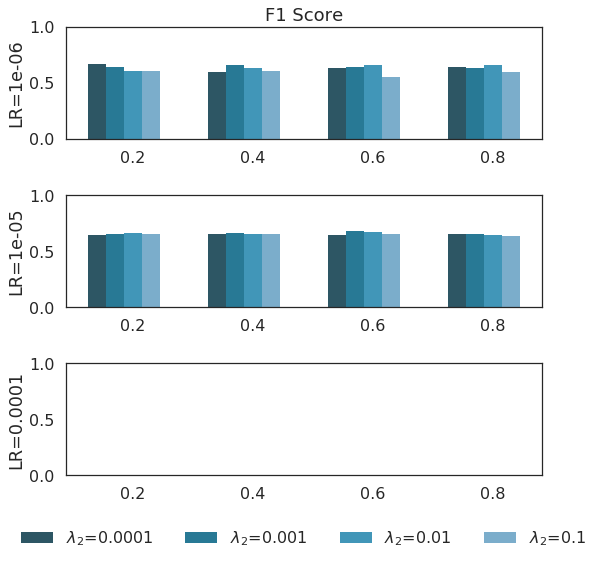

In [74]:
sns.set_style("white")
sns.palplot
plt.figure(figsize=(8,8))

for i in xrange(3):
    plt.subplot(3,1,i+1)
    for j in xrange(4):
        plt.bar(np.array([0,1,2,3])+(0.15*j), val_accs[i,j,:], 
                label='$\lambda_2$='+str(reg_arr[j]), color=color_list[j], width=0.15)
    
    #sns.despine()
    plt.ylabel('LR=' + str(lr_arr[i]))
    plt.ylim([0.0,1.0])
    plt.yticks([0.0,0.5,1.0])
    
    plt.xticks(np.array([0,1,2,3]) + 1.2 / 4, ('0.2', '0.4', '0.6', '0.8'))
    
    if i == 3:
        plt.xlabel('Dropout', fontsize=18)
    
    if i == 0:
        plt.title('F1 Score', fontsize=18)

        
    
legend = plt.legend(loc='lower center', bbox_transform=plt.gcf().transFigure, 
                    ncol=4, bbox_to_anchor=(1.05,0,-1,1), fontsize=16)  

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, bottom=0.15)

#plt.savefig('images/gt_hyperparam.png')

### Plot with best Hyperparameter Combination

In [75]:
ii,jj,kk = np.unravel_index(val_accs.argmax(), val_accs.shape)
print 'Best Lr: ', lr_arr[ii]
print 'Best Reg: ', reg_arr[jj]
print 'Best Dropout: ', do_arr[kk]
print 'F1 Score: ', val_accs.max()

Best Lr:  1e-05
Best Reg:  0.001
Best Dropout:  0.6
F1 Score:  0.6820276497695853


In [76]:
# train_acc, train_loss, val_acc, val_loss, pr, re, f1, tpr, fpr, thresh, auc = \
# parse_results_all(data_folder+'long_runs/200_max_'+network+'_'+str(lr_arr[ii])+'_1.0_0.0_'+
#                                                         str(reg_arr[jj])+'_128_'+str(do_arr[kk])+'.npz')

train_acc, train_loss, val_acc, val_loss, pr, re, f1, tpr, fpr, thresh, auc = \
parse_results_all(data_folder+network+'_'+str(lr_arr[ii])+'_1.0_0.0_'+
                  str(reg_arr[jj])+'_64_'+str(do_arr[kk])+'.npz')

print 'Best Val Acc: ', np.max(val_acc)
print '\nBest F1: ', np.max(f1)
print 'Best Pr: ', pr[np.argmax(f1)]
print 'Best Re: ', re[np.argmax(f1)]
print '\nBest AUC: ', auc[0]

Best Val Acc:  0.6491228070175425

Best F1:  0.6820276497695853
Best Pr:  0.5408163265306123
Best Re:  0.9024390243902439

Best AUC:  0.6448342011510002
